### Embeddings
An embedding is a representation of data in a low-dimensional space, which captures some aspects of the original data's structure. Essentially, embeddings translate large, sparse data types (like text or nodes in a graph) into **dense vectors of fixed size.** This transformation is done in such a way that the relationships and similarities between the original data points are reflected in the **distances and directions** of their vector representations.

So embedding is a vector that represents a certain object (word, sentence, product, ...)
- [Perfect Embeddings Explanation](https://jalammar.github.io/illustrated-word2vec/)

### Word2Vec
Word2Vec is a popular algorithm in NLP used for obtaining embeddings of words. Its main idea is that the meaning of a word can be inferred by the words closely surrounding it. The continuous vector representation is **capable of capturing semantic and syntactic similarities.**

Word2Vec uses shallow NN with a single hidden layer. The input layer consists of one-hot encoded vectors representing words, and the output layer predicts the context or target words. The hidden layer represents the word embeddings, which are learned during training.

Simple Word2Vec model uses *N words* to predict the next word. However, the main issue of this approach is that it doesn't take into account more context (surrounding words). The following modifications solve this problem:
- `Continuous Bag of Words (CBOW)`:
    - In this architecture, the model predicts the target word based on the context words surrounding it. The context words are used to predict the target word in the middle of a sliding window.
- `Skip-gram`:
    - In contrast to CBOW, the skip-gram architecture predicts the context words (or surrounding words) given a target word. It tries to maximize the probability of predicting context words given the target word.

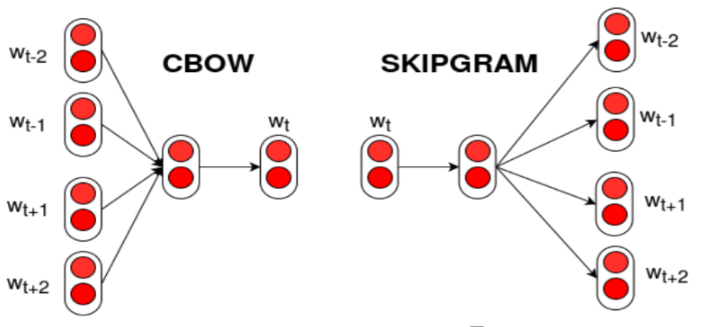

### How Does Word2Vec Work?
Word2Vec learns word embeddings by processing a large corpus of text data. It iterates over each word in the corpus and updates the word embeddings to maximize the likelihood of predicting surrounding words (in skip-gram) or the target word (in CBOW) based on the context words.

After training, each word in the vocabulary is represented by a dense vector in the embedding space. Words with similar meanings or usage contexts will have similar embeddings, allowing Word2Vec to capture semantic relationships between words.

Once embeddings are obtained, the following operations can be applied:
- Vector operations
- Similarity search
- Clustering
- Can be used as features for a model

### What is Negative Sampling and Why it is Useful?
The main idea behind negative sampling in Word2Vec is to **simplify and speed up the training process of the neural network** used for word embeddings. Instead of using the traditional softmax function, which is computationally expensive due to normalization over the entire vocabulary (for each training step), negative sampling proposes an alternative approach that approximates the softmax.

- `Objective Simplification`: The original Word2Vec model (specifically, the Skip-gram model) aims to find word embeddings that are good at predicting context words given a target word. For each word-context pair, the softmax function would traditionally be used to compute the probability distribution over the entire vocabulary for the context words. **However, computing this distribution is costly**, especially with large vocabularies.

- `Binary Classification Task`: Negative sampling simplifies this by **turning the multi-class classification problem into a series of binary classification tasks.** For a given target word, it focuses on distinguishing a real context word from a handful of randomly sampled "negative" words (words not in the target word's actual context). This approach significantly reduces computational complexity.

- `Sampling Strategy`: In each training step, along with the positive example (the actual word-context pair), a small number of negative samples (words not in the context) are selected. The model is then trained to distinguish these negative samples from the positive sample, effectively learning the context.

- `Efficiency`: This method **drastically reduces the computational load** since the model **updates weights for only a small subset of the vocabulary** (the positive sample and a few negative samples) instead of the entire vocabulary for each training example.

**Intuition:** Negative sampling leverages the idea that the model can learn a good representation of words not just by knowing which words appear close to each other, but also by understanding which words are not likely to appear in similar contexts. This contrasts with simply predicting the presence of context words, offering a more nuanced approach to learning word embeddings.

### Word2Vec Disadvantages

Word2Vec, while innovative and powerful for generating word embeddings, does come with its share of disadvantages:

- `Context Limitation`: Word2Vec embeddings are context-independent, meaning each word is assigned a single vector representation, regardless of its context. This can be a significant limitation for words with multiple meanings (polysemy) or different usages based on context, as it fails to capture the nuances of such words adequately.

- `Requirement for Large Datasets`: To generate meaningful and rich word embeddings, Word2Vec needs a substantial amount of text data. The quality of the embeddings improves with more data, which might not be feasible for specific applications or languages with limited available text resources.

- `Ignoring Word Order`: Word2Vec captures the semantic relationship between words based on their co-occurrence within a certain window size but does not account for word order within that window. This can be a limitation for capturing syntactic nuances or for languages where word order plays a crucial role in meaning.

- `Out-of-Vocabulary (OOV) Words`: Since Word2Vec generates embeddings only for words present in its training corpus, it cannot inherently handle words not seen during training (OOV words). This requires additional strategies, such as using a token for unknown words, which may not be satisfactory for capturing the meanings of these unseen words.

- `Storage Space`: Although more compact than one-hot encodings, the word vectors generated by Word2Vec can still consume a significant amount of memory, especially when dealing with very large vocabularies. This can be a concern for memory-constrained environments.

- `Training Time`: Despite its efficiency improvements over previous models, training a Word2Vec model on a very large dataset can be time-consuming and computationally expensive, especially without access to high-performance computing resources.


### Word2Vec Advantages 

- `Semantic and Syntactic Similarities`: Word2Vec captures a high degree of semantic and syntactic similarity among words. Words that are used in similar contexts tend to have embeddings that are close to each other in the vector space, enabling the model to capture nuanced relationships among words, such as synonyms, antonyms, and more abstract relationships.

- `Pre-training:` Word2Vec can be pre-trained on a large corpus of text and then applied or fine-tuned for specific tasks. This transfer learning capability allows for improved performance in tasks with limited labeled data by leveraging the knowledge gained from the larger dataset.

- `Versatility and Model Performance Improvement:` The embeddings generated by Word2Vec can be used in a wide variety of NLP tasks, including text classification, sentiment analysis, machine translation, and more, making it a versatile tool in the NLP toolkit.

### Gensim, Glove, FastText
Gensim is a popular Python library used for topic modeling, document similarity, and other language processing tasks. It provides implementations for various algorithms, including Word2Vec, FastText, and GloVe -> which are techniques for generating word embeddings—dense vector representations of words in a continuous vector space.

- `FastText`: FastText is an extension of Word2Vec, also developed by Facebook AI Research (FAIR). It introduces the concept of subword embeddings, where words are represented as bags of character n-grams.
It helps **handle out-of-vocabulary words and capture morphological information better.** Gensim includes an implementation of FastText, allowing users to train FastText models or use pre-trained FastText embeddings.

- `GloVe`: GlobalVectors is an unsupervised learning algorithm for obtaining word embeddings, developed by Stanford researchers. It constructs word embeddings by factorizing the co-occurrence matrix of words, emphasizing global word co-occurrence statistics. Gensim provides utilities for loading pre-trained GloVe embeddings and using them in NLP tasks.

**FastText**
- It's a linear model with a rank constraint and a fast loss approximation
- FastText can be trained on more than one 200M words in less than 5 minutes using a standard multicore CPU
- Classify nearly 150K reviews in less than a minute
- It was developed mainly for large datasets (ex. 1 billion words). In case of small datasets hyperparameters should be tuned carefully to avoid overfitting or you shoud get more data.

### Why word2vec Expects Sentences as Input? 
Word2Vec, as well as many other embedding models, expects sentences as input because they are **designed to learn word embeddings based on the context in which words appear within sentences.** By analyzing the surrounding words in a sentence, these models can capture the semantic relationships and similarities between words.


### Best Practice
- Embedding size should not be too small and big
    - `small`: model badly represents relationships between words
    - `big`: sparce vectors that might be similar to OHE in the end
- When we don't have much data, better use `CBOW` -> less sensitive to overfitting. `CBOW` works faster than `SkipGram` but has worse ability to take into account rare words.
- Activation function is **linear** for `CBOW` and `SkipGram` NNs

### Resources
- https://kavita-ganesan.com/comparison-between-cbow-skipgram-subword/
- [Glove Explanation](https://www.youtube.com/watch?v=qi_gcdi19zs)
- [Nice Kaggle Notebook](https://www.kaggle.com/c/word2vec-nlp-tutorial)
